<a href="https://colab.research.google.com/github/hllj/fer-dexpression/blob/master/FER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
!pip install -q -U opencv-python

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
root_path = 'gdrive/My Drive/FER-Model' #my folder directory 

In [0]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import glob
import cv2
from __future__ import print_function
import keras
from keras.applications.vgg16 import VGG16
from keras.layers import Input, BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import ReLU
from keras.layers import Dense
from keras.models import Model

Using TensorFlow backend.


#Load trained Model and testing some examples:

In [0]:
model = keras.models.load_model(root_path + '/model.h5')






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [0]:
from google.colab.patches import cv2_imshow

In [0]:
EMOTION_DICT = ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']
def make_prediction(model, path):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(path, gray)

    face_cascade = cv2.CascadeClassifier(root_path + '/haarcascade_frontalface_default.xml') 
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        face_clip = img[y:y + h, x:x + w]
        cv2.imwrite(path, cv2.resize(face_clip, (350, 350)))
    
    # read the processed image then make prediction and display the result
    read_image = cv2.imread(path)
    cv2_imshow(read_image)
    read_image = read_image.reshape(1, 350, 350, 3)
    read_image_final = read_image / 255.0  # normalizing the image

    top_pred = model.predict(read_image_final)
    emotion_label = -1
    value = 0
    print("Predicted Expression Probabilities")
    for idx, emotion in enumerate(EMOTION_DICT):
      print(emotion, " : ", top_pred[0][idx])
      if (top_pred[0][idx] > value):
        emotion_label = idx
        value = top_pred[0][idx]
    print("Dominant Probability = " + str(EMOTION_DICT[emotion_label]))


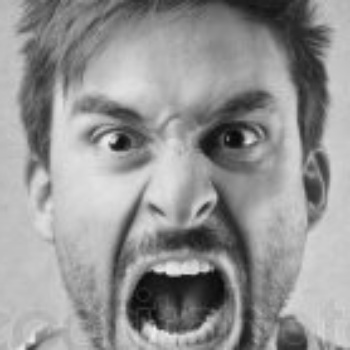

Predicted Expression Probabilities
anger  :  0.002353019
contempt  :  0.02624323
disgust  :  0.014618096
fear  :  0.26157048
happiness  :  0.12348648
neutral  :  0.01676229
sadness  :  0.015120937
surprise  :  0.5398454
Dominant Probability = surprise


In [0]:
make_prediction(model, root_path + '/examples/test_angry.jpg')

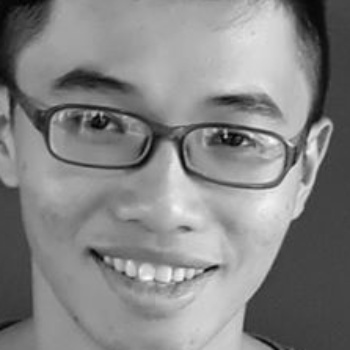

Predicted Expression Probabilities
anger  :  0.012183361
contempt  :  0.0012845797
disgust  :  0.039715655
fear  :  0.06313218
happiness  :  0.8824735
neutral  :  0.00021816717
sadness  :  0.00079111994
surprise  :  0.00020149782
Dominant Probability = happiness


In [0]:
make_prediction(model, root_path + '/examples/test.jpg')

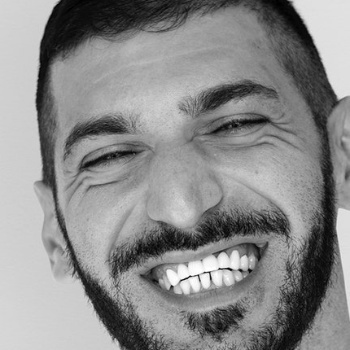

Predicted Expression Probabilities
anger  :  0.018688248
contempt  :  0.0037661255
disgust  :  0.47858596
fear  :  0.03592029
happiness  :  0.45572692
neutral  :  0.0005299325
sadness  :  0.006090514
surprise  :  0.00069207646
Dominant Probability = disgust


In [0]:
make_prediction(model, root_path + '/examples/test_happy.jpg')

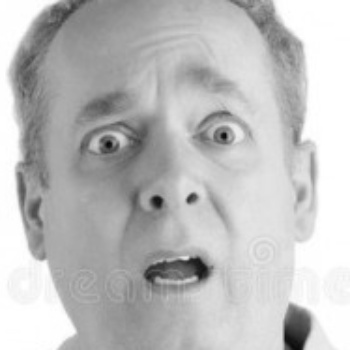

Predicted Expression Probabilities
anger  :  0.00034633442
contempt  :  0.008698062
disgust  :  0.0007941612
fear  :  0.12502058
happiness  :  0.00242384
neutral  :  0.023572257
sadness  :  0.009027337
surprise  :  0.8301174
Dominant Probability = surprise


In [0]:
make_prediction(model, root_path + '/examples/test_surprise.jpg')